In [7]:
from squlearn.feature_map.qcnn_feature_map import qcnn_feature_map
from squlearn.feature_map.qcnn_feature_map import prototype_routine
from squlearn.util import Executor
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
import numpy as np
import itertools
import random
from squlearn.expectation_operator import SingleAmplitude
from squlearn.qnn import QNN
from squlearn.feature_map.layered_feature_map import LayeredFeatureMap
from qiskit.primitives import Estimator
from squlearn.qnn.training import regression
from squlearn.optimizers import SLSQP,Adam
from squlearn.qnn.loss import SquaredLoss
from squlearn.qnn.qnnr import QNNRegressor

In [8]:
def generate_data_all_combi(length):
    """Creates a 2 dimensional numpy array with all combinations of zeros and ones.
      It outputs this with there labels (0 if more zeros than ones, 1 else)"""
    all_combi_list = list(itertools.product([0,1],repeat=length))
    X_tuple_list = all_combi_list
    X = np.array(X_tuple_list)  #converts list of tuples into a numpy array with dimension 2
    Y = np.count_nonzero(X==0,axis=1) #counts the number of zeros in each sublist
    for i in range(len(Y)):
        zeros = Y[i]
        if 2*zeros > length:
            Y[i] = 0
        else:
            Y[i] = 1 
    return X,Y

def generate_train_data(all_combination_data,train_size):
    """Generates from given all_combination data a train set with there labels."""
    X,Y = all_combination_data[0],all_combination_data[1]
    data_size = Y.size
    index_list = range(data_size)
    index_choice = random.sample(index_list, train_size)
    X_train = np.array([X[i] for i in index_choice])
    Y_train = np.array([Y[i] for i in index_choice])
    return X_train,



In [9]:
qubits = 6
train_set_size = 32
#-------------------------------------------------------------------------------------------------------------------------------------------

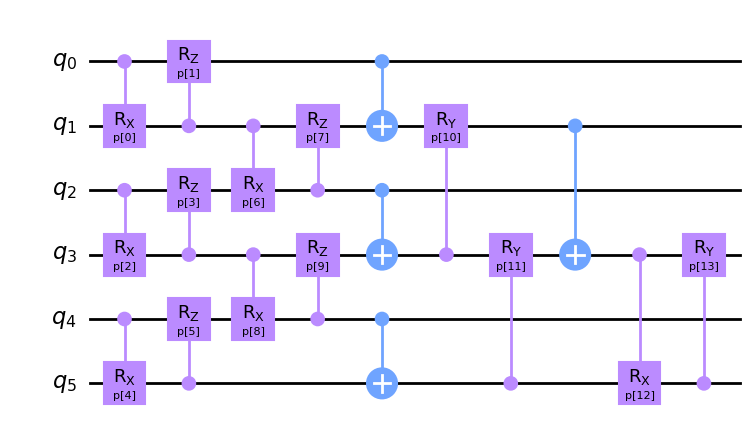

In [13]:
#QCNN crx with var_param, cry with var_param, after pool: cry with var_param
qcnn_train = qcnn_feature_map(qubits)

x = ParameterVector("x",2)
conv_gate1 = QuantumCircuit(2)
conv_gate1.crx(x[0],0,1)
conv_gate1.crz(x[1],1,0)
pool_gate = QuantumCircuit(2)
pool_gate.cx(0,1)
y = ParameterVector("y",1)
conv_gate2 = QuantumCircuit(2)
conv_gate2.cry(y[0],1,0)
z = ParameterVector("z",2)
fully_gate = QuantumCircuit(2)
fully_gate.crx(z[0],0,1)
fully_gate.cry(z[1],1,0)
qcnn_train.convolution(conv_gate1,entangled=True,var_param=True)
qcnn_train.pooling(pool_gate)
qcnn_train.convolution(conv_gate2,entangled=True,var_param=True)
qcnn_train.pooling(pool_gate)
qcnn_train.fully_connected(fully_gate)

param_vec_for_qcnn = ParameterVector("p", qcnn_train.num_parameters)
qcnn_train.get_circuit([],param_vec_for_qcnn).decompose().draw()

